## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

### INSIGHTS AND VISUALIZATIONS OF THE DATA WRANGLING PROJECT

#### INSIGHTS



The dataset for this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. To perform an analysis, the following datasets was needed:

1. The WeRateDogs Twitter archive
2. The tweet image predictions
3. Additional data from the Twitter API(retweet_count, favorite_count)

The datasets was read into separate dataframes, assessed, cleaned and merged.

After wrangling and merging the three dataframes of the WeRateDogs Twitter archive to a master dataset, I stored the master dataset in a csv file and read it into a dataframe using pandas read_csv function.
I used the pandas .describe() method to find the summary statistics of the columns in the master datframe. I also used .value_counts functions on the columns: 'image_number' and 'dog_stages' to find insights. Finally, I used the .groupby() function to find out which dog stage has the highest number of retweets and likes.

In [1]:
#import the pandas library
import pandas as pd

In [2]:
# Read the master dataset into a dataframe
df = pd.read_csv("twitter_archive_master.csv")

In [3]:
# Summary Statistics on the master dataframe
df.describe()

,tweet_id,rating_numerator,rating_denominator,image_number,pred_1_conf,pred_2_conf,pred_3_conf,retweet_count,favorite_count
count,1.984000e+03,1984.000000,1984.000000,1984.000000,1984.000000,1.984000e+03,1.984000e+03,1984.000000,1984.000000
mean,7.356111e+17,12.281754,10.540323,1.203629,0.593179,1.345706e-01,6.038487e-02,2245.259073,7715.442036
std,6.740163e+16,41.600540,7.336133,0.561738,0.271962,1.006083e-01,5.093326e-02,4020.989231,11379.577939
min,6.660209e+17,0.000000,10.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,66.000000
25%,6.758223e+17,10.000000,10.000000,1.000000,0.362063,5.411538e-02,1.623400e-02,495.750000,1644.250000
50%,7.082494e+17,11.000000,10.000000,1.000000,0.587222,1.175870e-01,4.959335e-02,1080.000000,3465.000000
75%,7.873413e+17,12.000000,10.000000,1.000000,0.843827,1.952647e-01,9.174633e-02,2562.750000,9558.500000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70741.000000,144891.000000


In [4]:
# Counts on the image_number column 
df['image_number'].value_counts(sort = True)

1    1702
2     190
3      62
4      30
Name: image_number, dtype: int64

In [5]:
# Counts on the dog_stage column
df['dog_stage'].value_counts(sort = True)

pupper           203
doggo             62
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [6]:
# Mean retweet_count of the dog_stage
df.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending = False)

dog_stage
doggo,puppo      16140.000000
doggo             5973.838710
puppo             5326.181818
floofer           3986.428571
doggo,pupper      3456.555556
doggo,floofer     2795.000000
pupper            1909.812808
Name: retweet_count, dtype: float64

In [7]:
# Mean favorite_count of the dog_stage
df.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending = False)

dog_stage
doggo,puppo      41896.000000
puppo            19573.727273
doggo            17602.838710
doggo,floofer    14845.000000
doggo,pupper     12038.111111
floofer          11225.571429
pupper            6205.423645
Name: favorite_count, dtype: float64

Some of the insights found from the analysis are:
1. The minimum and maximum number for the retweet_count(the number of retweets for a tweet) is 11 and 70742 respectively.
2. The minimum and maximum number for the favorite_count(the number of retweets for a tweet) is 66 and 144891 respectively.
3. Most dogs are pupper.
4. Dogs with multiple stages(doggo, puppo) have the highest mean retweet_count and favorite_count.

#### VISUALIZATIONS

The visualization below displays the dog stages with the highest average retweets and the image number that has the highest confident predictions of dog breed.

In [8]:
#import the neccesary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# The average retweet grouped by dog stages
retweet_average_by_dog_stages = df.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending = False)

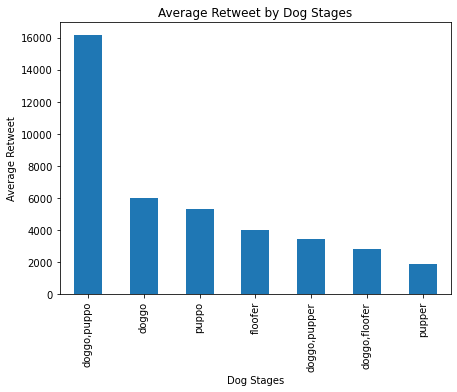

In [10]:
# Bar chart of the average retweet grouped by dog stages
retweet_average_by_dog_stages.plot(kind = 'bar', figsize = [7,5])
plt.xlabel('Dog Stages')
plt.ylabel('Average Retweet')
plt.title('Average Retweet by Dog Stages');

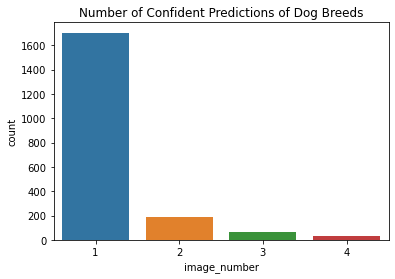

In [11]:
# The image number that has the highest confident predictions
sns.countplot( x = 'image_number', data = df)
plt.title('Number of Confident Predictions of Dog Breeds');

The visualizations above show that:

1.The (doggo, puppo) have the highest average retweets.

2.This plot shows that the highest number of confident predictions of dog breeds is image 1.
